In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from bs4 import BeautifulSoup
import requests
import html5lib
import datetime
import os

In [2]:
b=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NHL" + "2015-11-30" + ".csv", index_col=0)
c=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NHL" + "2015-12-02" + ".csv", index_col=0)
d=pd.read_csv("/Users/baekstboy/Desktop/CS109Project/Sports_Data/NHL" + "2015-12-03" + ".csv", index_col=0)
b['Date']=datetime.datetime.strptime("2015-11-30", "%Y-%m-%d")
c['Date']=datetime.datetime.strptime("2015-12-02", "%Y-%m-%d")
d['Date']=datetime.datetime.strptime("2015-12-03", "%Y-%m-%d")
frames = [b, c,d]
result = pd.concat(frames).reset_index(drop=True)
result['Streak']=result['Streak'].str.replace('Won ', '+')
result['Streak']=result['Streak'].str.replace('Lost ', '-')
result['Streak']=result['Streak'].str.replace('OT ', '-')
result['Streak']=result['Streak'].astype(int)
result['Teams']=result['Teams'].str.replace("Montréal","Montreal")

In [91]:
result.head()

,Ranking,Teams,DIV,GP,W,L,OT,P,ROW,GF,GA,Diff,Home,Away,S/O,L10,Streak,Pct,Date
0,1,Montreal,A,25,18,4,3,39,17,88,56,+32,9-2-2,9-2-1,1-1,6-2-2,-1,0.720000,2015-11-30
1,2,Dallas,C,24,19,5,0,38,18,85,62,+23,9-3-0,10-2-0,1-0,8-2-0,2,0.791667,2015-11-30
2,3,Washington,M,23,17,5,1,35,16,75,51,+24,10-3-1,7-2-0,1-0,7-2-1,5,0.739130,2015-11-30
3,4,NY Rangers,M,24,16,6,2,34,15,70,50,+20,10-3-1,6-3-1,1-1,6-4-0,-3,0.666667,2015-11-30
4,5,St. Louis,C,24,15,6,3,33,14,65,58,+7,7-2-2,8-4-1,1-0,5-3-2,1,0.625000,2015-11-30


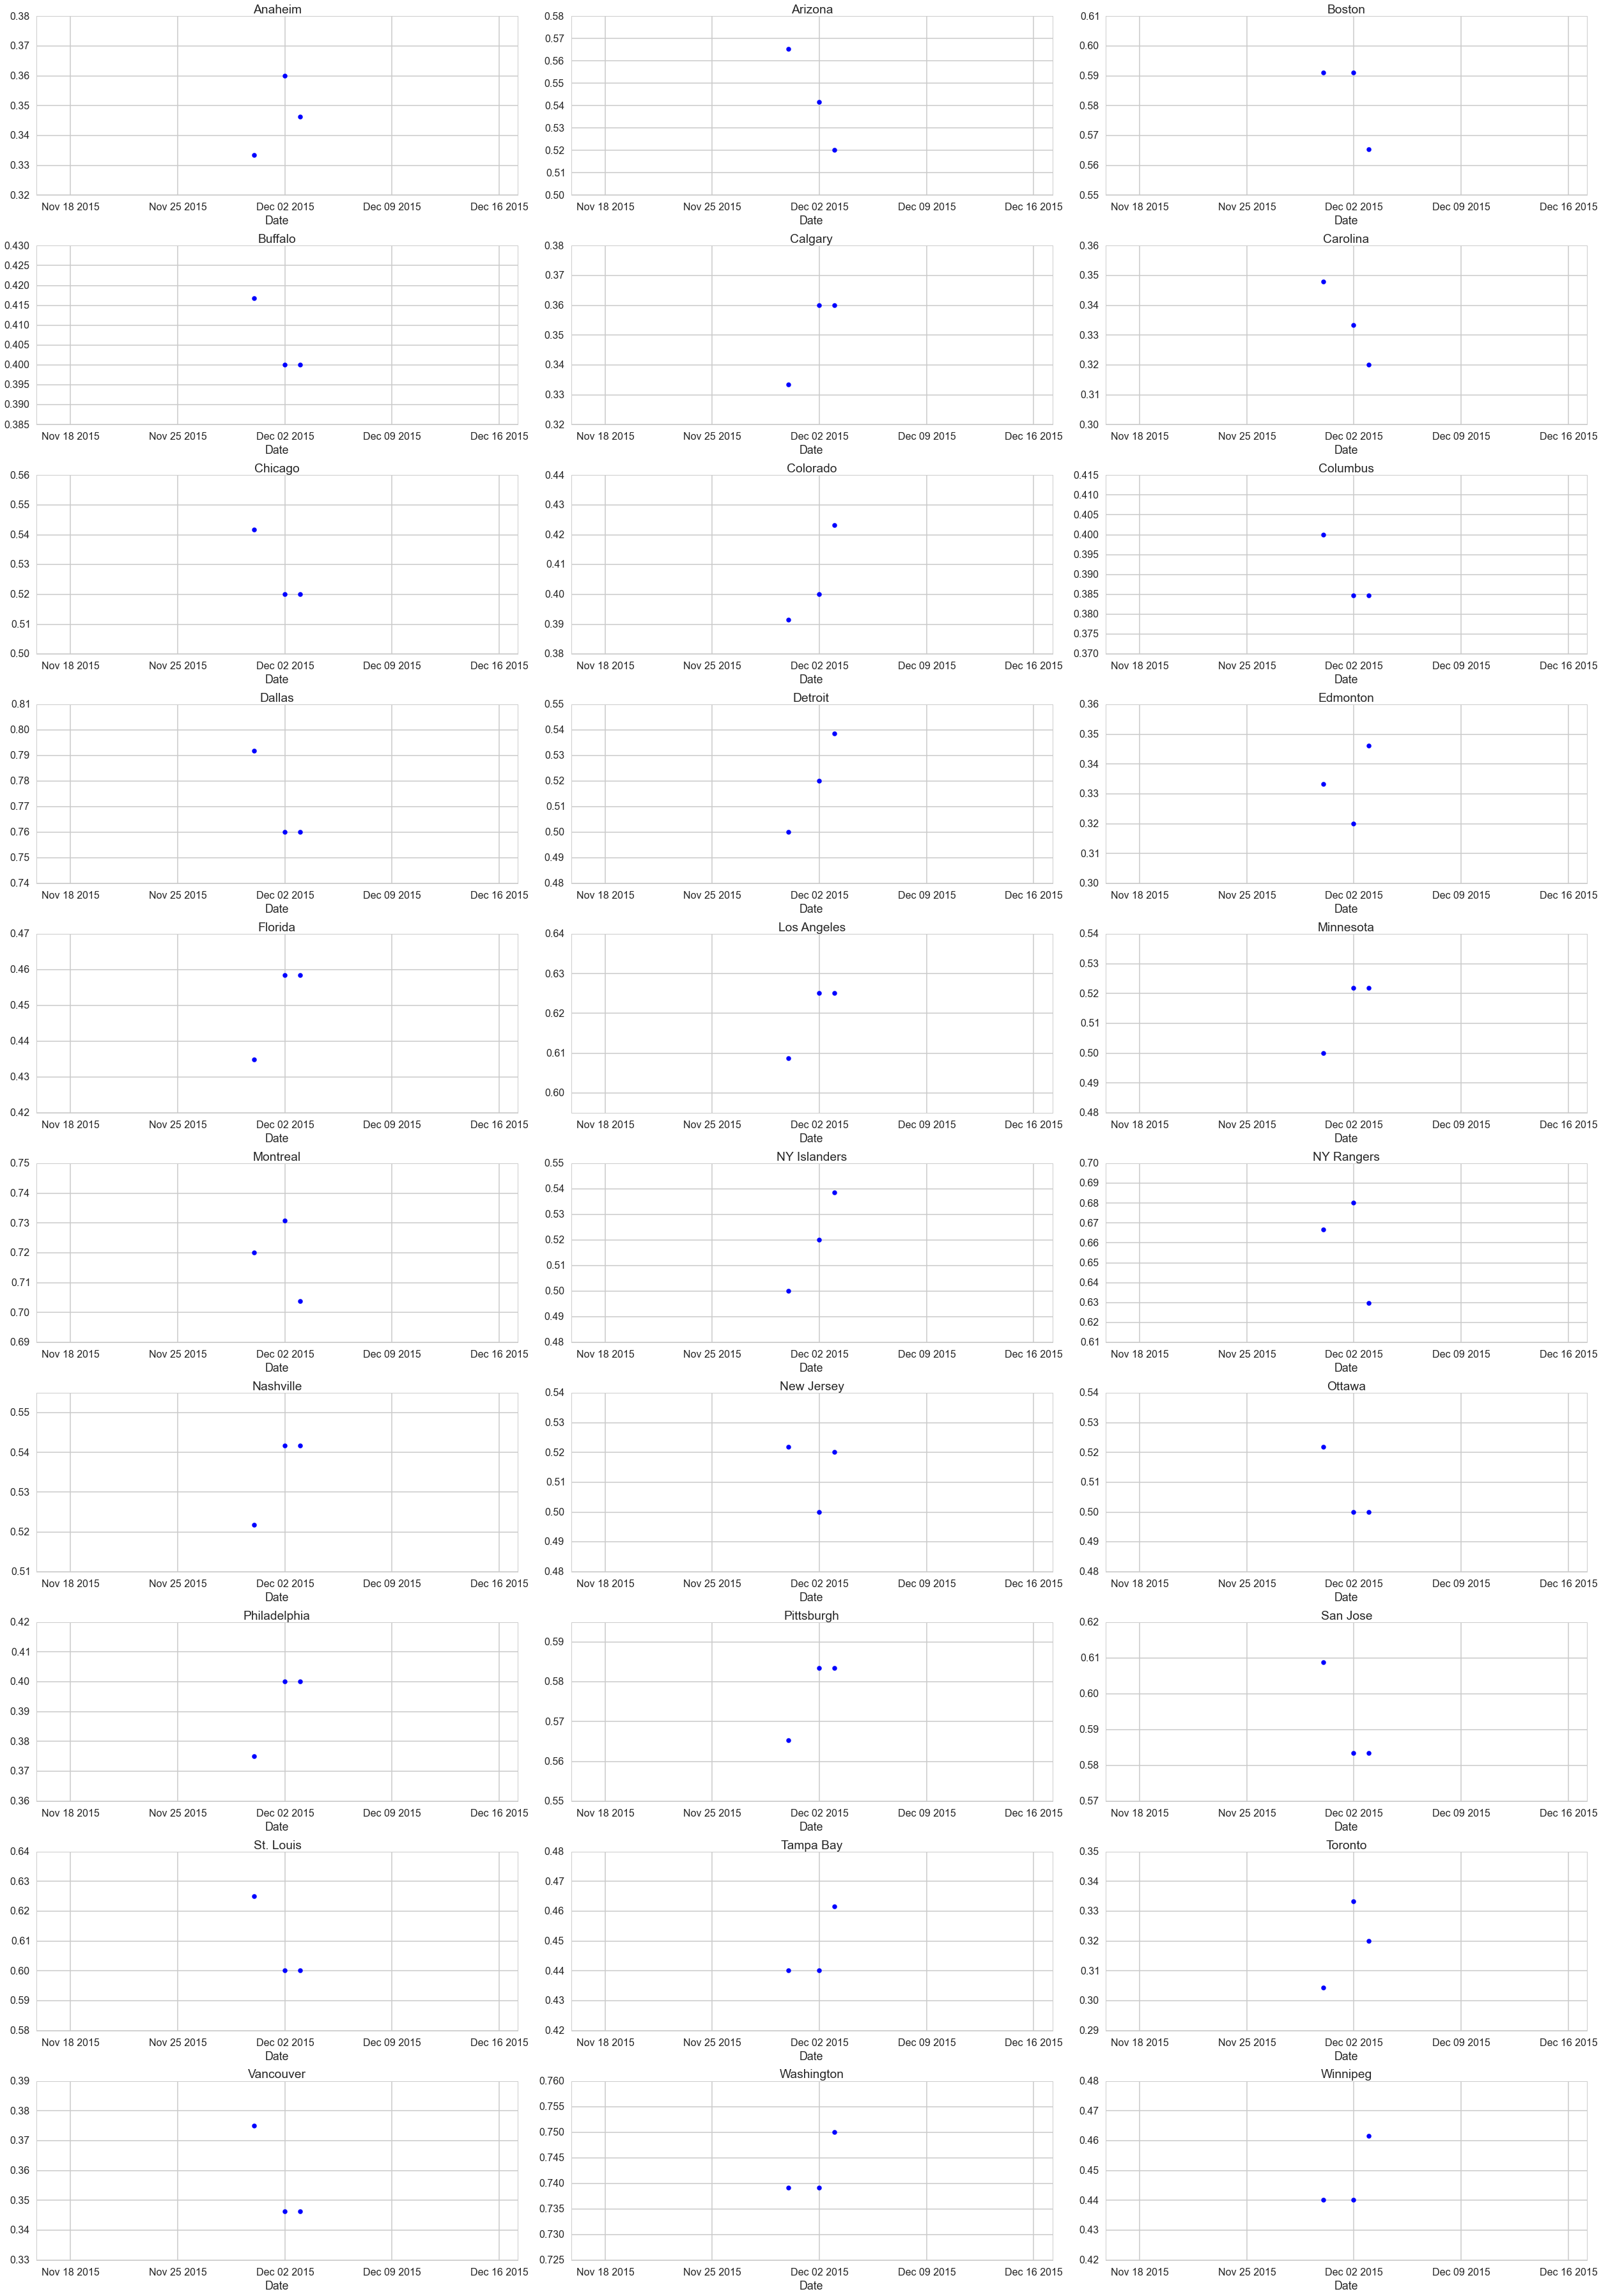

In [101]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), result.groupby('Teams')):
    #establish a figure
    plt.figure()
    ax.scatter(team[1]['Date'].values, team[1]['Pct'].values, alpha=1, color='b', lw=3)
    ax.set_title(team[0])
    ax.set_xlabel('Date')

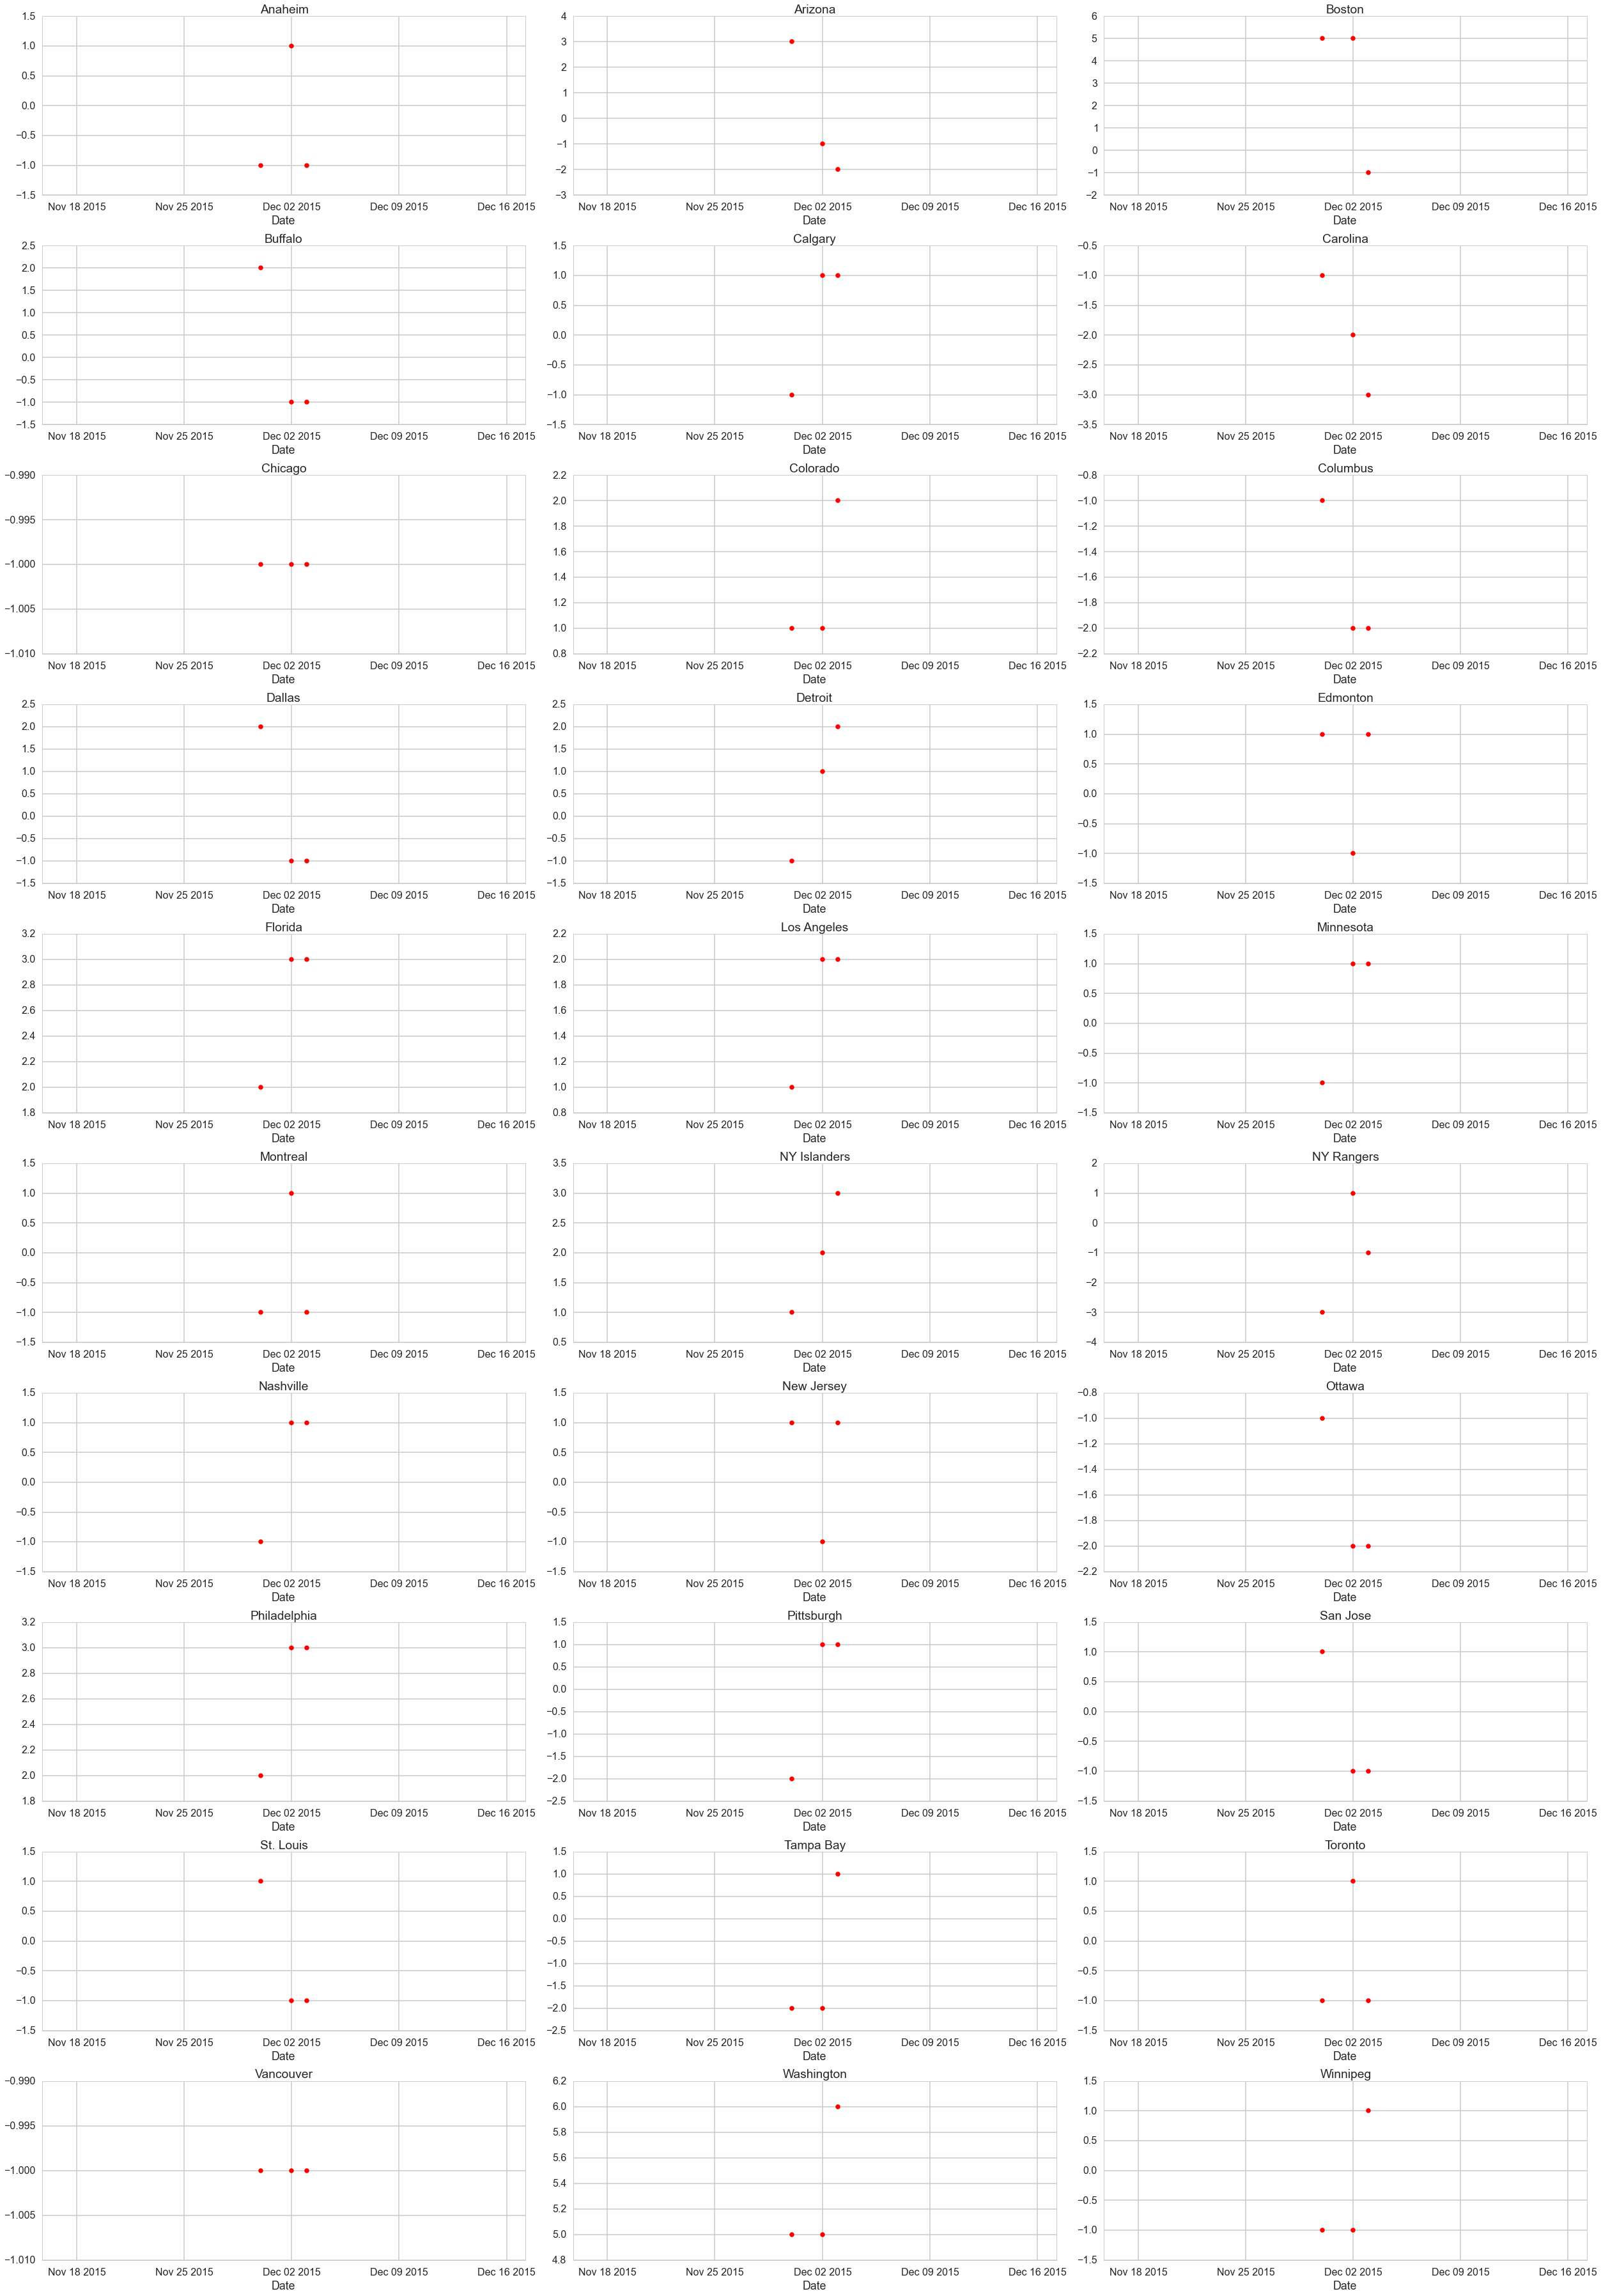

In [100]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(35, 50), tight_layout=True)

for ax, team in zip(axes.ravel(), result.groupby('Teams')):
    plt.figure()
    ax.scatter(team[1]['Date'].values, team[1]['Streak'].values, alpha=1, color='r', lw=3)
    ax.set_title(team[0])
    ax.set_xlabel('Date')

In [ ]:
#scatter plot of ticket price vs. winning record here